# Statistical analysis of salaries in data science related jobs

Author of this notebook: Izael Manuel Rascón Durán A01562240

The goal of this project is to identify the conditions that make a data analyst better paid according to the database provided by [Kaggle](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries) on a sample of data analysts in different parts of the world.
Some of the question that guide this project are:

- What is the salary a data analyst can aspire to?
- In which countries are the best salaries offered?
- Have salaries increased over time?
- Does the level of experience influence the salary?
- Does the size of the company influence the salary it can offer a data analyst?
- What type of contract (part-time, full-time, etc.) offers the best salaries? What type of contract will be the most suitable?

Part of this notebook is based in [Titanic Data Science Solutions notebook in Kaggle.](https://www.kaggle.com/code/startupsci/titanic-data-science-solutions)

## Resume
For the purpose of this exploratory analysis, we used almost statistical inferential techniques such as the calculation of measures of central tendency, dispersion measures, positional measures (quartiles, boxplot), distribution analysis, etc.

Following all the steps in this exploratory analysis, we can gain a deep understanding of the variables and the data in the dataset in general, which can help us to answer to almost every simple question we can make about it.

## Database exploration
### Accessing the database and setting up the required libraries

In [525]:
# data analysis and wrangling
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [526]:
df_salaries = pd.read_csv('ds_salaries.csv', index_col=0)

### Analyze dataset features
In the next codeblock we can see all the available features of the dataset already described in the [Kaggle page here.](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

In [527]:
print(df_salaries.columns.values)

['work_year' 'experience_level' 'employment_type' 'job_title' 'salary'
 'salary_currency' 'salary_in_usd' 'employee_residence' 'remote_ratio'
 'company_location' 'company_size']


#### Which features are categorical?

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

- Nominal: employment_type, job_title, salary_currency, employee_residence and company_location.
- Ordinal: experience_level and company_size.

#### Which features are numerical?

Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

- Continuous: salary, salary_in_usd and remote_ratio (although each one is integer data type, and remote ratio can be easily converted to a categorical statistical type of data because it only has 3 different values that represent an ordinal category).
- Timeseries: work_year.

In [528]:
# preview of the data

df_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


#### Extra observations
The dataset have no missing values in any feature, which means we don't have to worry about fill empty values. We can observe that there it is 4 features that are integer data type and 7 that are string data type.

We might need to convert in future all string features (categorical data) to numerical data types (numerical data).

In [529]:
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


### Database exploration
#### Describe the numerical features

In [530]:
df_salaries.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


#### Describe the categorical features

In [531]:
df_salaries.describe(include=['O'])

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


In [532]:
df_salaries.mode().iloc[0]

work_year                     2022.0
experience_level                  SE
employment_type                   FT
job_title             Data Scientist
salary                         80000
salary_currency                  USD
salary_in_usd               100000.0
employee_residence                US
remote_ratio                   100.0
company_location                  US
company_size                       M
Name: 0, dtype: object

In [533]:
pd.crosstab(df_salaries['experience_level'], 'frequency')

col_0,frequency
experience_level,
EN,88
EX,26
MI,213
SE,280


In [534]:
pd.crosstab(df_salaries['employment_type'], 'frequency')

col_0,frequency
employment_type,
CT,5
FL,4
FT,588
PT,10


In [535]:
pd.crosstab(df_salaries['job_title'], 'frequency')

col_0,frequency
job_title,
3D Computer Vision Researcher,1
AI Scientist,7
Analytics Engineer,4
Applied Data Scientist,5
Applied Machine Learning Scientist,4
BI Data Analyst,6
Big Data Architect,1
Big Data Engineer,8
Business Data Analyst,5


In [536]:
pd.crosstab(df_salaries['salary_currency'], 'frequency')

col_0,frequency
salary_currency,
AUD,2
BRL,2
CAD,18
CHF,1
CLP,1
CNY,2
DKK,2
EUR,95
GBP,44


In [537]:
pd.crosstab(df_salaries['employee_residence'], 'frequency')

col_0,frequency
employee_residence,
AE,3
AR,1
AT,3
AU,3
BE,2
BG,1
BO,1
BR,6
CA,29


In [538]:
pd.crosstab(df_salaries['company_location'], 'frequency')

col_0,frequency
company_location,
AE,3
AS,1
AT,4
AU,3
BE,2
BR,3
CA,30
CH,2
CL,1


In [539]:
pd.crosstab(df_salaries['company_size'], 'frequency')

col_0,frequency
company_size,
L,198
M,326
S,83


#### Describe the variables with using visualization tools
##### Cuantitative variables positional measures and outliers detection

<AxesSubplot:>

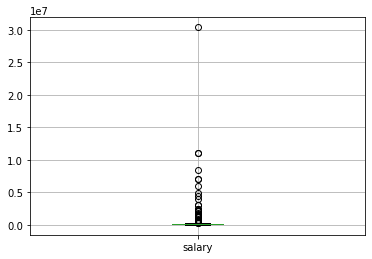

In [540]:
df_salaries.boxplot(column='salary')

<AxesSubplot:>

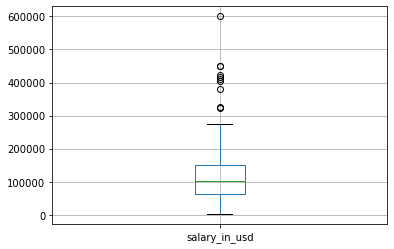

In [541]:
df_salaries.boxplot(column='salary_in_usd')

We get the salaries outliers:

In [542]:
def get_outliers(df, cols, quantil_size):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    df = df[((df[cols] < (Q1 - quantil_size * IQR)) | (df[cols] > (Q3 + quantil_size * IQR))).any(axis=1)]
    return df



outliers_salary = get_outliers(df_salaries, ['salary', 'salary_in_usd'], 3)[['salary', 'salary_in_usd']]

outliers_salary

,salary,salary_in_usd
7,11000000,35735
11,3000000,40481
16,4450000,41689
27,720000,33511
33,450000,450000
63,412000,412000
92,1450000,19609
94,2200000,29751
97,450000,450000
102,11000000,36259


##### Cuantitative variables distributions

array([[<AxesSubplot:title={'center':'salary'}>]], dtype=object)

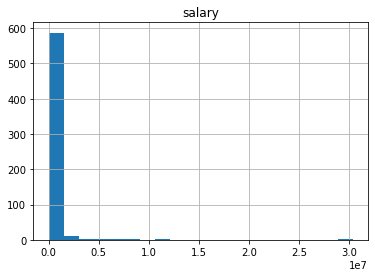

In [543]:
df_salaries.hist(column='salary', bins=20)

array([[<AxesSubplot:title={'center':'salary_in_usd'}>]], dtype=object)

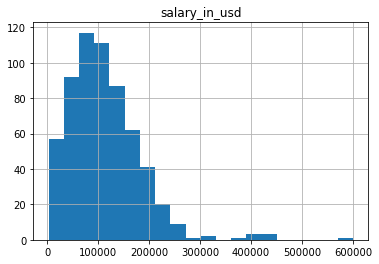

In [544]:
df_salaries.hist(column='salary_in_usd', bins=20)

Without outliers

(0.0, 270000.0)

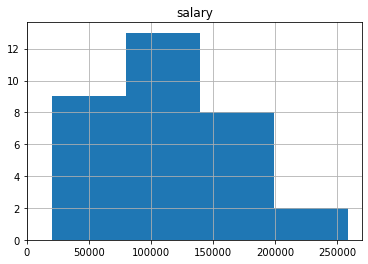

In [545]:
df_salaries.iloc[~outliers_salary.index].hist(column='salary', bins=100)
plt.xlim(0 ,0.27e6)

Both distributions are asymmetrical

##### Categorical variables distributions

Experience level

In [546]:
px.treemap(df_salaries, path=['experience_level'])

C:\Users\izael\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



<AxesSubplot:xlabel='experience_level'>

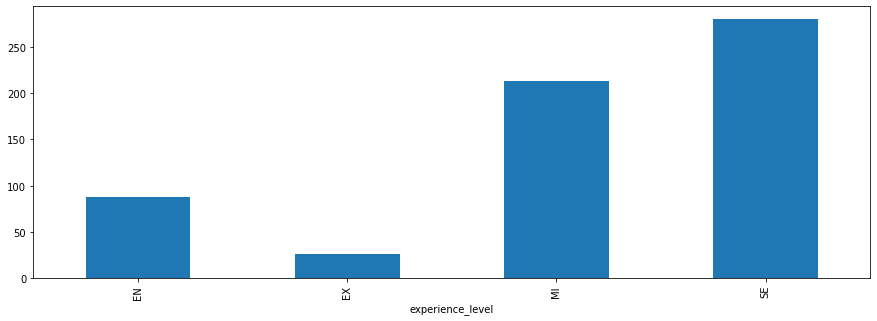

In [547]:
df_salaries.groupby(['experience_level'])['experience_level'].count().plot.bar(figsize=(15, 5))

Employment type

In [548]:
px.treemap(df_salaries, path=['employment_type'])

C:\Users\izael\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



<AxesSubplot:xlabel='employment_type'>

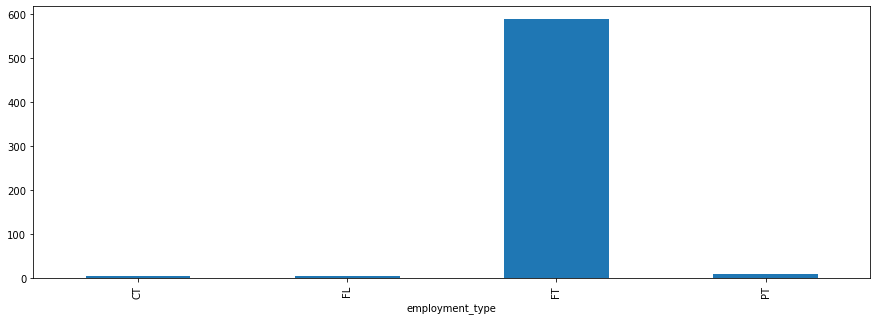

In [549]:
df_salaries.groupby(['employment_type'])['employment_type'].count().plot.bar(figsize=(15, 5))

Job title

In [550]:
px.treemap(df_salaries, path=['job_title'])

C:\Users\izael\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



<AxesSubplot:xlabel='job_title'>

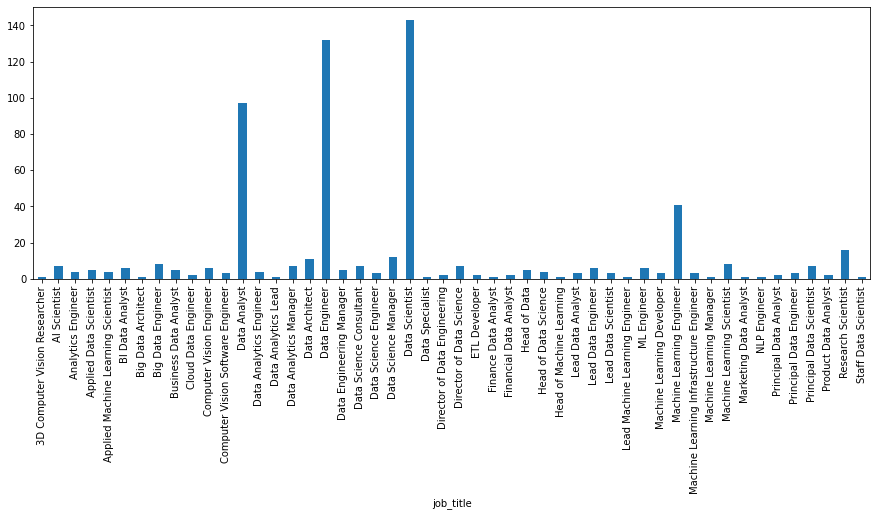

In [551]:
df_salaries.groupby(['job_title'])['job_title'].count().plot.bar(figsize = (15,5))

Salary currency

In [552]:
px.treemap(df_salaries, path=['salary_currency'])

C:\Users\izael\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



<AxesSubplot:xlabel='salary_currency'>

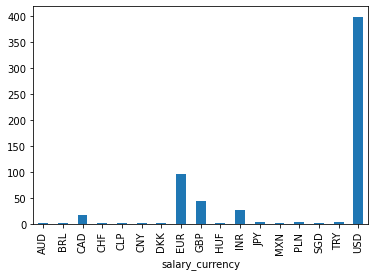

In [553]:
df_salaries.groupby(['salary_currency'])['salary_currency'].count().plot.bar()

Employee residence

In [554]:
px.treemap(df_salaries, path=['employee_residence'])

C:\Users\izael\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



<AxesSubplot:xlabel='employee_residence'>

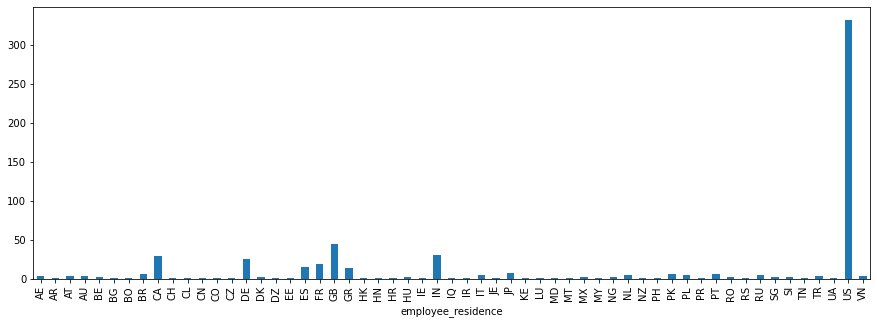

In [555]:
df_salaries.groupby(['employee_residence'])['employee_residence'].count().plot.bar(figsize = (15,5))

Company location

In [556]:
px.treemap(df_salaries, path=['company_location'])

C:\Users\izael\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



<AxesSubplot:xlabel='company_location'>

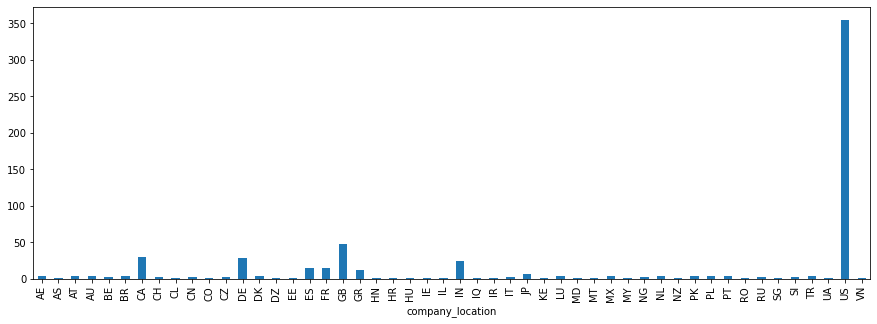

In [557]:
df_salaries.groupby(['company_location'])['company_location'].count().plot.bar(figsize = (15,5))

Company size

In [558]:
px.treemap(df_salaries, path=['company_size'])

C:\Users\izael\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



<AxesSubplot:xlabel='company_size'>

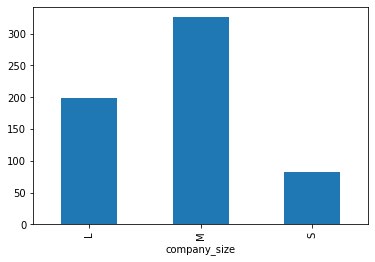

In [559]:
df_salaries.groupby(['company_size'])['company_size'].count().plot.bar()

#### Identify the data quality
Here we are looking for duplicated data, missing data and validating the relevance of each variable.

There is 42 duplicated registries

In [560]:
df_salaries.duplicated().sum()  # Duplicated registries

42

There is no null data

In [561]:
df_salaries.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Let's try to observe if there is a relevance in each category comparing the salary_in_usd values:

<AxesSubplot:xlabel='work_year'>

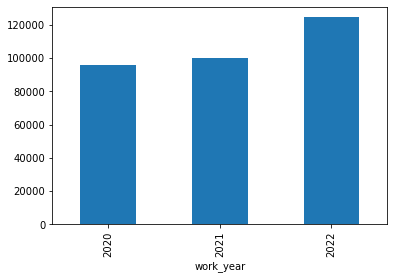

In [562]:
df_salaries.groupby(by='work_year').salary_in_usd.mean().plot.bar()

<AxesSubplot:xlabel='experience_level'>

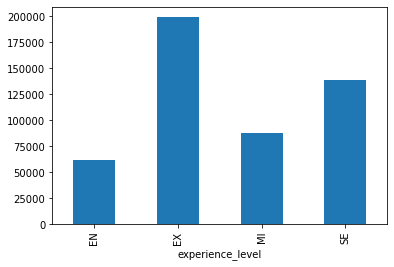

In [563]:
df_salaries.groupby(by='experience_level').salary_in_usd.mean().plot.bar()

<AxesSubplot:xlabel='employment_type'>

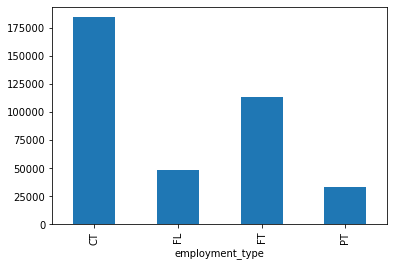

In [564]:
df_salaries.groupby(by='employment_type').salary_in_usd.mean().plot.bar()

<AxesSubplot:xlabel='job_title'>

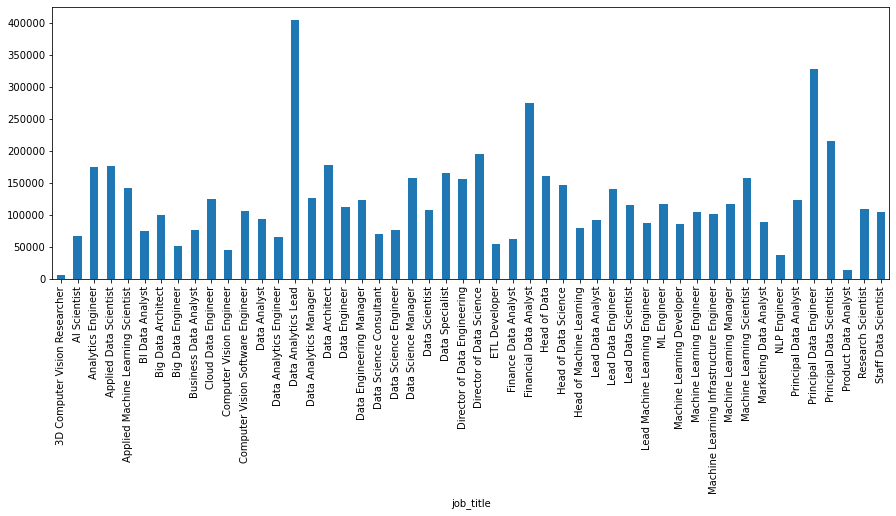

In [565]:
df_salaries.groupby(by='job_title').salary_in_usd.mean().plot.bar(figsize=(15,5))

<AxesSubplot:xlabel='employee_residence'>

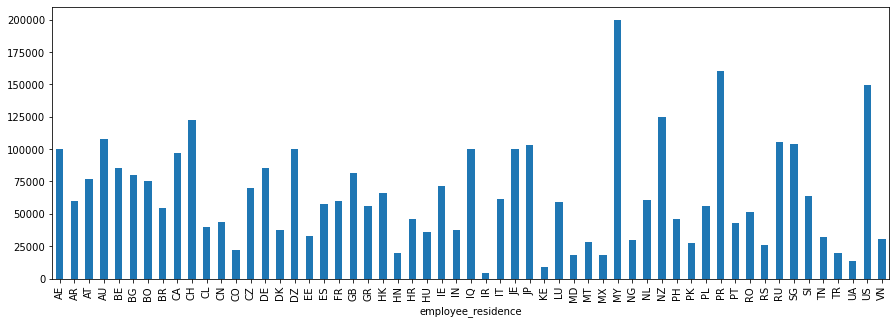

In [566]:
df_salaries.groupby(by='employee_residence').salary_in_usd.mean().plot.bar(figsize=(15,5))

<AxesSubplot:xlabel='remote_ratio'>

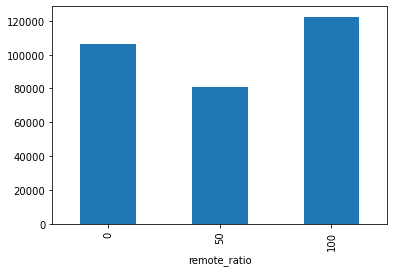

In [567]:
df_salaries.groupby(by='remote_ratio').salary_in_usd.mean().plot.bar()

<AxesSubplot:xlabel='company_location'>

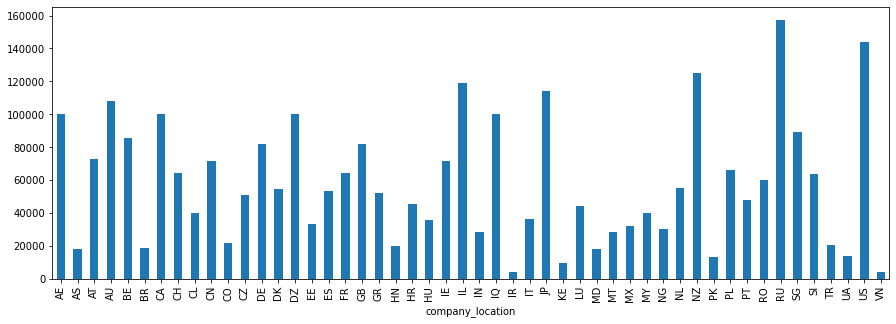

In [568]:
df_salaries.groupby(by='company_location').salary_in_usd.mean().plot.bar(figsize=(15,5))

<AxesSubplot:xlabel='company_size'>

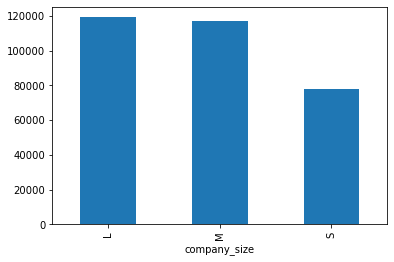

In [569]:
df_salaries.groupby(by='company_size').salary_in_usd.mean().plot.bar()

We observe relevance in each variable plotted.

### Data preparation (optional for future modeling)
Now, we have to decide which columns are relevant and which are not.
- No relevant variables: We decided to not include the salary and salary_currency because it does not give us new or different information than salary_in_usd, the employee_residence or the company_location.
- Relevant variables: work_year, experience_level, employment_type, job_title, salary_currency, employee_residence, remote_ratio, company_location and company_size.
- Objective variable: salary_in_usd
We choose salary_in_usd as objetive variable because is the variable that answers mostly all our questions, and because is the easiest to compare between registries.

#### Data transformation of categorical data

In [570]:
# Transformation of ordinal data
ordinal_enc = OrdinalEncoder(categories=[['EN', 'MI', 'SE', 'EX'],['S', 'M', 'L']])
df_ordinal = pd.DataFrame()
df_ordinal[['experience_level','company_size']] = ordinal_enc.fit_transform(df_salaries[['experience_level','company_size']])
df_ordinal[['remote_ratio', 'work_year']] = df_salaries[['remote_ratio', 'work_year']]
df_ordinal

,experience_level,company_size,remote_ratio,work_year
0,1.0,2.0,0,2020
1,2.0,0.0,0,2020
2,2.0,1.0,50,2020
3,1.0,0.0,0,2020
4,2.0,2.0,50,2020
...,...,...,...,...
602,2.0,1.0,100,2022
603,2.0,1.0,100,2022
604,2.0,1.0,0,2022
605,2.0,1.0,100,2022


In [571]:
# Transformation of nominal data
nominal_names = ['employment_type', 'job_title', 'employee_residence', 'company_location']
df_nominal = pd.get_dummies(df_salaries[nominal_names], prefix=nominal_names)
df_nominal

,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_3D Computer Vision Researcher,job_title_AI Scientist,job_title_Analytics Engineer,job_title_Applied Data Scientist,job_title_Applied Machine Learning Scientist,job_title_BI Data Analyst,...,company_location_PL,company_location_PT,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
603,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
604,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
605,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [572]:
df_clean_numerical = pd.concat([df_salaries['salary_in_usd'], df_ordinal, df_nominal], axis=1)
df_clean_numerical

,salary_in_usd,experience_level,company_size,remote_ratio,work_year,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_3D Computer Vision Researcher,...,company_location_PL,company_location_PT,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN
0,79833,1.0,2.0,0,2020,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,260000,2.0,0.0,0,2020,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,109024,2.0,1.0,50,2020,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20000,1.0,0.0,0,2020,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,150000,2.0,2.0,50,2020,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,154000,2.0,1.0,100,2022,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
603,126000,2.0,1.0,100,2022,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
604,129000,2.0,1.0,0,2022,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
605,150000,2.0,1.0,100,2022,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


We get rid of the outliers in the data salaries because they are not what most of the people have.

In [573]:
df_clean_numerical = df_clean_numerical.drop(labels=outliers_salary.index, axis=0).reset_index(drop=True)
df_clean_numerical.head()

,salary_in_usd,experience_level,company_size,remote_ratio,work_year,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_3D Computer Vision Researcher,...,company_location_PL,company_location_PT,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN
0,79833,1.0,2.0,0,2020,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,260000,2.0,0.0,0,2020,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,109024,2.0,1.0,50,2020,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20000,1.0,0.0,0,2020,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,150000,2.0,2.0,50,2020,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [574]:
df_clean = df_salaries.drop(labels=outliers_salary.index, axis=0).reset_index(drop=True)
df_clean = df_clean.drop(columns=['salary', 'salary_currency'])
df_clean

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
568,2022,SE,FT,Data Engineer,154000,US,100,US,M
569,2022,SE,FT,Data Engineer,126000,US,100,US,M
570,2022,SE,FT,Data Analyst,129000,US,0,US,M
571,2022,SE,FT,Data Analyst,150000,US,100,US,M


Does the size of the company influence the salary it can offer a data analyst?
What type of contract (part-time, full-time, etc.) offers the best salaries? What type of contract will be the most suitable?

## Answer the questions
### What is the salary a data analyst can aspire to?
The most general way of answering this question is to analyse the data of this year for all the data analyst.

In [575]:
data_analyst_salaries = df_clean[(df_clean['work_year'] == 2022) & (df_clean['job_title'] == 'Data Analyst')].salary_in_usd
data_analyst_salaries.describe()

count        73.000000
mean     100550.739726
std       36488.323586
min       20000.000000
25%       75000.000000
50%      105000.000000
75%      126500.000000
max      170000.000000
Name: salary_in_usd, dtype: float64

Looking at this number we can say that the 50% of the Data Analyst have a salary between $75,000 and $126,500 dollars; being the mean $100,550. Take in count that this is a simplification, and we are not taking many other parameters such as country or any other that could be useful for making more exact predictions.

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

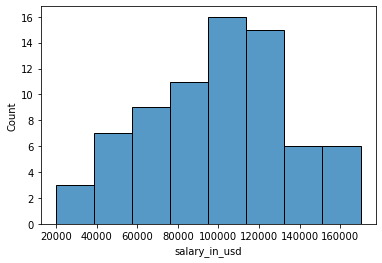

In [576]:
sns.histplot(data_analyst_salaries)

### In which countries are the best salaries offered?
For this, let's calculate the top mean of the salaries for each country and show only the top 5.

In [577]:
top_country_salaries = df_clean.groupby(by='company_location').salary_in_usd.mean().sort_values(ascending=False).head()
top_country_salaries

company_location
JP    167333.333333
RU    157500.000000
US    139188.083573
NZ    125000.000000
IL    119059.000000
Name: salary_in_usd, dtype: float64

In [578]:
print('The top country mean salary is:', top_country_salaries.mean())
print('The world mean salary is:', df_clean.salary_in_usd.mean())

The top country mean salary is: 141616.08338136406
The world mean salary is: 112339.70506108203


As we can se above, the top five countries salaries are Japan, Russia, United States of America, New Zealand and Israel. His mean is around the 141,616 dollars meanwhile in the mean global salary is 112,339 dollars.

### Have salaries increased over time?
Let's show the mean global salary over time.

In [579]:
mean_salary_in_time = df_clean.groupby(by='work_year').salary_in_usd.mean()
mean_salary_in_time

work_year
2020     89168.484848
2021     98627.310881
2022    125638.407643
Name: salary_in_usd, dtype: float64

<AxesSubplot:xlabel='work_year'>

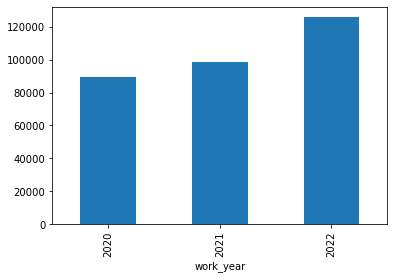

In [580]:
mean_salary_in_time.plot.bar()

As we see, the mean salary has been incrementing over the years: in 2022 the mean salary was 89,168 dollars and 2021 it was around 98,627 dollars, which shows an increment of 9,459 dollars. In 2022 the mean salary registered is 125,638, which represents an increment of 27,011!!!. The increment between 2021 and 2022 is almost the triple than between 2020 and 2021!!!. The tendency is that the mean salary is incrementing over the years.

## Conclusion
As we observed, simple (but sometimes large) analysis of the data, we can gain a lot of information an insight about a dataset which in the future can lead us to a better model implementation. This notebook and the data prepared will help us to implement a machine learning model for predicting the salary of everyone according to his conditions, and maybe help the author choose the better work option in the future.